In [ ]:
!pip install tensorflow
!pip install pyvi
# !pip install -U pip setuptools wheel
!pip install -U spacy
# !python -m spacy download ja_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Processing dataset

- EN-VN

In [ ]:
# read data
import string
vi_input_ = []
with open("/content/drive/MyDrive/hbi/data_vi") as f:
  for line in f:
    line = line.replace('  ', ' ').lower()
    vi_input_.append(line.strip())

en_input_ = []
with open("/content/drive/MyDrive/hbi/data_en") as f:
  for line in f:
    en_input_.append(line.strip())

for i in zip(en_input_[:5], vi_input_[:5]):
  print(i)


('GARMENT', 'may mặc')
('PATTERN', 'mẫu')
('Placement', 'vị trí')
('Part Code', 'mã phần')
('Fiber Code & Content', 'mã sợi & nội dung')


In [ ]:
# split_ratio = 0.02
# split = round(len(en_input_)* split_ratio)
# en_input = en_input_[:split]
# vi_input = vi_input_[:split]
en_input = en_input_
vi_input = vi_input_

In [ ]:
print(len(en_input))
print(len(vi_input))

496
496


In [ ]:
# Thêm token đánh dấu điểm bắt đầu và kết thúc của câu vào mỗi câu trong ngôn ngữ đích
eos = '<eos>'
bos = '<bos>'

def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

from pyvi import ViTokenizer
vi_input_tokenize = [ViTokenizer.tokenize(i).split() for i in vi_input]
for i in range(len(vi_input_tokenize)):
  vi_input_tokenize[i].insert(0, bos)
  vi_input_tokenize[i].insert(len(vi_input_tokenize[i]), eos)

import spacy
spacy_en = spacy.load('en_core_web_sm')
en_input_tokenize = [[tok.text for tok in spacy_en.tokenizer(text)] for text in en_input]
for i in range(len(en_input_tokenize)):
  en_input_tokenize[i].insert(0, bos)
  en_input_tokenize[i].insert(len(en_input_tokenize[i]), eos)


In [ ]:
print(en_input_tokenize[0])
print(vi_input_tokenize[0])

['<bos>', 'GARMENT', '<eos>']
['<bos>', 'may_mặc', '<eos>']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(en_input_tokenize)
en_vocabulary = en_tokenizer.word_index
en_size = len(en_vocabulary)
print(en_vocabulary)
print(en_size) # number of words in the vocabulary

vi_tokenizer = Tokenizer()
vi_tokenizer.fit_on_texts(vi_input_tokenize)
vi_vocabulary = vi_tokenizer.word_index
vi_size = len(vi_vocabulary)
print(vi_vocabulary)
print(vi_size)


{'<bos>': 1, '<eos>': 2, '"': 3, 'to': 4, '.': 5, 'for': 6, '-': 7, 'updated': 8, 'width': 9, 'version': 10, 'fly': 11, ')': 12, 'added': 13, 'by': 14, '(': 15, ',': 16, 'and': 17, 'new': 18, 'opening': 19, 'marker': 20, 'from': 21, 'email': 22, 'of': 23, 'mfg': 24, 'panel': 25, 'spec': 26, '/': 27, 'hem': 28, 'at': 29, 'as': 30, 'pattern': 31, 'adding': 32, 'plant': 33, 'length': 34, 'waist': 35, '&': 36, 'change': 37, 'cut': 38, 'front': 39, 'the': 40, 'requested': 41, 'fabric': 42, 'garment': 43, 'update': 44, 'reduce': 45, '+': 46, '”': 47, ';': 48, 'measurement': 49, 'back': 50, 'id': 51, 'routing': 52, 'previous': 53, 'again': 54, 'previously': 55, 'it': 56, 'was': 57, 'following': 58, 'half': 59, 'leg': 60, 'binding': 61, 'on': 62, 'cost': 63, 'top': 64, '“': 65, 'color': 66, 'inner': 67, 'down': 68, 'add': 69, 'seam': 70, 'sling': 71, 'sew': 72, 'saving': 73, 'additional': 74, 'in': 75, 'pom': 76, '5': 77, 'usage': 78, 'bai': 79, 'bottom': 80, 'code': 81, 'size': 82, 'label': 8

In [ ]:
vi_vocabulary["email"]

30

In [ ]:
en_vocabulary_reverse = {}
for key, value in en_tokenizer.word_index.items():
  en_vocabulary_reverse[value] = key
en_vocabulary_reverse[0] = ''

vi_vocabulary_reverse = {}
for key, value in vi_tokenizer.word_index.items():
  vi_vocabulary_reverse[value] = key
vi_vocabulary_reverse[0] = ''

print(en_vocabulary_reverse)
print(vi_vocabulary_reverse)


{1: '<bos>', 2: '<eos>', 3: '"', 4: 'to', 5: '.', 6: 'for', 7: '-', 8: 'updated', 9: 'width', 10: 'version', 11: 'fly', 12: ')', 13: 'added', 14: 'by', 15: '(', 16: ',', 17: 'and', 18: 'new', 19: 'opening', 20: 'marker', 21: 'from', 22: 'email', 23: 'of', 24: 'mfg', 25: 'panel', 26: 'spec', 27: '/', 28: 'hem', 29: 'at', 30: 'as', 31: 'pattern', 32: 'adding', 33: 'plant', 34: 'length', 35: 'waist', 36: '&', 37: 'change', 38: 'cut', 39: 'front', 40: 'the', 41: 'requested', 42: 'fabric', 43: 'garment', 44: 'update', 45: 'reduce', 46: '+', 47: '”', 48: ';', 49: 'measurement', 50: 'back', 51: 'id', 52: 'routing', 53: 'previous', 54: 'again', 55: 'previously', 56: 'it', 57: 'was', 58: 'following', 59: 'half', 60: 'leg', 61: 'binding', 62: 'on', 63: 'cost', 64: 'top', 65: '“', 66: 'color', 67: 'inner', 68: 'down', 69: 'add', 70: 'seam', 71: 'sling', 72: 'sew', 73: 'saving', 74: 'additional', 75: 'in', 76: 'pom', 77: '5', 78: 'usage', 79: 'bai', 80: 'bottom', 81: 'code', 82: 'size', 83: 'label

In [ ]:
import pickle
with open('/content/drive/MyDrive/hbi/dictionary_en.pkl', 'wb') as f:
    pickle.dump(en_vocabulary, f)
with open('/content/drive/MyDrive/hbi/dictionary_vi.pkl', 'wb') as f:
    pickle.dump(vi_vocabulary, f)
with open('/content/drive/MyDrive/hbi/dictionary_vi_reverse.pkl', 'wb') as f:
    pickle.dump(vi_vocabulary_reverse, f)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

en_sequence = en_tokenizer.texts_to_sequences(en_input_tokenize)
enmaxlen = max([len(i) for i in en_sequence])
en_sequence = pad_sequences(en_sequence, maxlen = enmaxlen, padding = 'post')
print(en_sequence[0])

vi_sequence = vi_tokenizer.texts_to_sequences(vi_input_tokenize)
vimaxlen = max([len(i) for i in vi_sequence])
vi_sequence = pad_sequences(vi_sequence, maxlen = vimaxlen, padding = 'post')
print(vi_sequence[0])


[ 1 43  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 1 71  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [ ]:
print(en_sequence.shape[1])
print(vi_sequence.shape[1])

48
54


In [ ]:
split_ratio = 0.8
split = round(len(vi_sequence)* split_ratio)

trainX = en_sequence[:split]
testX = en_sequence[split:]
trainY = vi_sequence[:split]
testY = vi_sequence[split:]

train_samples = len(trainX)
val_samples = len(testX)
batch_size = 32
epochs = 400
latent_dim=128


In [ ]:
def generate_batch(X, y, batch_size):
  while True:
    for j in range(0, len(X), batch_size):
      encoder_input_data = []
      decoder_input_data = []
      decoder_target_data = []
      for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
        encoder_input_data.append(input_text)
        decoder_input_data.append(target_text)
        decodertargetdata = to_categorical(target_text, num_classes=vi_size+1)[1:]
        decoder_target_data.append(np.concatenate((np.array(decodertargetdata), np.zeros((1, vi_size+1))), axis = 0))
      encoder_input_data = np.array(encoder_input_data)
      decoder_input_data = np.array(decoder_input_data)
      decoder_target_data = np.array(decoder_target_data)
      yield([encoder_input_data, decoder_input_data], decoder_target_data)


## Training model

In [ ]:
# Define an input sequence and process it.
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import numpy as np
import re
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(en_size+1, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]


In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vi_size+1, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(vi_size+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
def generate_batch(X, y):
  encoder_input_data = []
  decoder_input_data = []
  decoder_target_data = []
  for i, (input_text, target_text) in enumerate(zip(X, y)):
    encoder_input_data.append(input_text)
    decoder_input_data.append(target_text)
    decodertargetdata = to_categorical(target_text, num_classes=vi_size+1)[1:]
    decoder_target_data.append(np.concatenate((np.array(decodertargetdata), np.zeros((1, vi_size+1))), axis = 0))
  encoder_input_data = np.array(encoder_input_data)
  decoder_input_data = np.array(decoder_input_data)
  decoder_target_data = np.array(decoder_target_data)
  return [encoder_input_data, decoder_input_data], decoder_target_data

In [ ]:
data_train, target_train = generate_batch(trainX, trainY)
data_test, target_test = generate_batch(testX, testY)

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
model.compile(optimizer=RMSprop(learning_rate=0.003),
              loss='categorical_crossentropy',
              metrics=['acc'])
history=model.fit(data_train, target_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(data_test, target_test),
                    steps_per_epoch = train_samples//batch_size,
                    validation_steps = val_samples//batch_size,
                    )


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 128)      │         96,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, None)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │         92,416 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 128), (None,   │        131,584 │ embedding[0][0],       │
│                           │ 128), (None, 128)]     │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 128),    │        131,584 │ embedding_1[0][0],     │
│                           │ (None, 128), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 722)      │         93,138 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 544,722 (2.08 MB)

 Trainable params: 544,722 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - acc: 0.2068 - loss: 6.3762 - val_acc: 0.7172 - val_loss: 5.2246
Epoch 2/400
 1/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - acc: 0.7094 - loss: 5.5501

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.7094 - loss: 5.5501 - val_acc: 0.0370 - val_loss: 5.7097
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - acc: 0.1551 - loss: 5.2462 - val_acc: 0.7211 - val_loss: 5.0324
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7464 - loss: 4.9433 - val_acc: 0.0370 - val_loss: 5.7763
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - acc: 0.1195 - loss: 5.0272 - val_acc: 0.0403 - val_loss: 4.8480
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0427 - loss: 4.6593 - val_acc: 0.0370 - val_loss: 5.3354
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - acc: 0.0407 - loss: 4.8335 - val_acc: 0.0422 - val_loss: 4.7250
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.0413 - loss: 4.5986 - val_acc: 0.0370 - val_loss: 5.2041
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - acc: 0.0415 - loss: 4.6887 - val_acc: 0.0552 - val_loss: 4.6404
Epoch 10/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - acc: 0.0513

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])
history=model.fit_generator(generate_batch(trainX, trainY, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(testX, testY, batch_size = batch_size),
                    validation_steps = val_samples//batch_size,
                    )


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 128)            96000     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, None, 128)            92416     ['input_2[0][0]']             
                                                                                              

<ipython-input-14-082615c0824e>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generate_batch(trainX, trainY, batch_size = batch_size),


12/12 [==============================] - 18s 739ms/step - loss: 6.5627 - acc: 0.0882 - val_loss: 6.5215 - val_acc: 0.0704
Epoch 2/400
12/12 [==============================] - 3s 261ms/step - loss: 6.1338 - acc: 0.0794 - val_loss: 5.6482 - val_acc: 0.0520
Epoch 3/400
12/12 [==============================] - 3s 263ms/step - loss: 5.4025 - acc: 0.0759 - val_loss: 5.2137 - val_acc: 0.0551
Epoch 4/400
12/12 [==============================] - 6s 489ms/step - loss: 5.1961 - acc: 0.0801 - val_loss: 5.1336 - val_acc: 0.1095
Epoch 5/400
12/12 [==============================] - 4s 288ms/step - loss: 5.1342 - acc: 0.0777 - val_loss: 5.3333 - val_acc: 0.0567
Epoch 6/400
12/12 [==============================] - 3s 264ms/step - loss: 5.1069 - acc: 0.0839 - val_loss: 5.1035 - val_acc: 0.0608
Epoch 7/400
12/12 [==============================] - 3s 272ms/step - loss: 5.0171 - acc: 0.0844 - val_loss: 5.0035 - val_acc: 0.1323
Epoch 8/400
12/12 [==============================] - 5s 432ms/step - loss: 4.952

KeyboardInterrupt: 

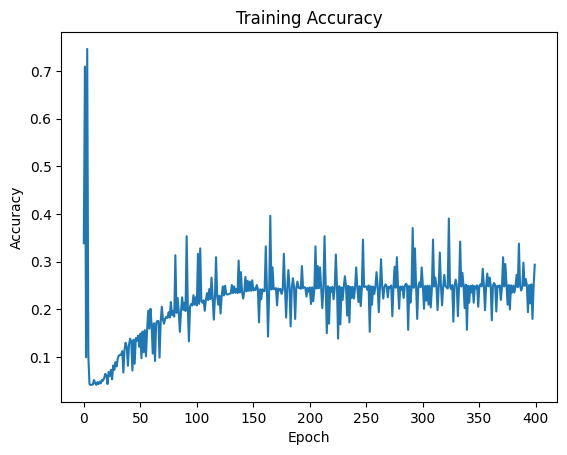

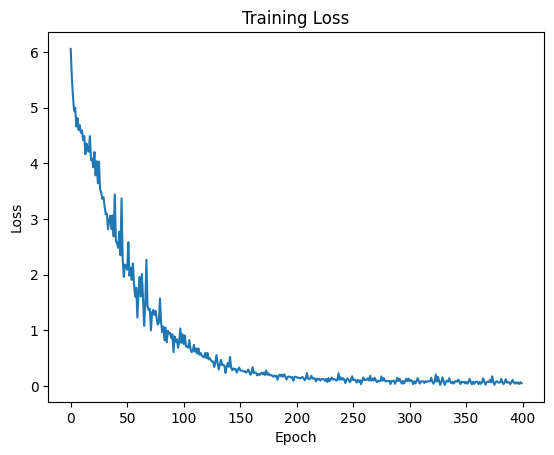

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig('accuracy.jpg')
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig('loss.jpg')

## Save pretrained model

In [ ]:
model.save("/content/drive/MyDrive/hbi/models/machine_v2.keras")
!zip -r model_keras_v2.zip /content/drive/MyDrive/hbi/models/machine_v2.keras
from google.colab import files
files.download ('model_keras_v2.zip')

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
pretrained_model = tf.keras.models.load_model('/content/drive/MyDrive/hbi/models/machine_v2.keras')
# Show the model architecture
pretrained_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 128)      │         96,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, None)           │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │         92,416 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 128), (None,   │        131,584 │ embedding[0][0],       │
│                           │ 128), (None, 128)]     │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 128),    │        131,584 │ embedding_1[0][0],     │
│                           │ (None, 128), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 722)      │         93,138 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,089,446 (4.16 MB)

 Trainable params: 544,722 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544,724 (2.08 MB)

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import numpy as np
import re


In [ ]:
pretrained_emb_layer = pretrained_model.get_layer('embedding')
encoder_inputs = Input(shape=(None,))
encoder_emb = pretrained_emb_layer(encoder_inputs)  # Use the pre-trained layer
encoder_lstm = pretrained_model.get_layer('lstm')
_, state_h, state_c = encoder_lstm(encoder_emb)
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = pretrained_model.get_layer('embedding_1')
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm =pretrained_model.get_layer('lstm_1')
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = pretrained_model.get_layer('dense')
decoder_outputs = decoder_dense(decoder_outputs)


## Encoder/Decoder model

In [ ]:
# Encode the input sequence to get the "Context vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_state_input = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_state_input)
decoder_states2 = [state_h2, state_c2]

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_state_input,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = vi_vocabulary[bos]

    # Sampling loop for a batch of sequences (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''

    # greedy search
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        # print(output_tokens)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        # print(sampled_token_index)
        sampled_word =vi_vocabulary_reverse[sampled_token_index]
        decoded_sentence += ' '+ sampled_word

        # Exit condition: either hit max length or find stop character.
        if (sampled_word == eos or
           len(decoded_sentence) > 500):
            stop_condition = True
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # Update states
        states_value = [h, c]
    return decoded_sentence


In [ ]:
batch_size=15
# test_gen = generate_batch(testX, testY, batch_size )
# (input_seq, actual_output), _ = next(test_gen)
(input_seq, actual_output), _ = generate_batch(testX, testY)
for i in range(batch_size):
  seq = input_seq[i]
  output = actual_output[i]
  decoded_sentence = decode_sequence(np.expand_dims(seq, axis=0))
  print(seq)
  print('Input Source sentence:', ' '.join([en_vocabulary_reverse[i] for i in seq]))
  print('Actual Target Translation:', ' '.join([vi_vocabulary_reverse[i] for i in output]))
  print('Predicted Target Translation:', decoded_sentence)

NameError: name 'generate_batch' is not defined

In [ ]:
def check_alpha(text):
   if text.isalpha():
     return True
   else:
     return False
def check_numeric(text):
    try:
        float(text)
        return True
    except ValueError:
        return False

def translate(seq_input):
  if type(seq_input)==str:
    seq_input = seq_input.lower()
  else:
    seq_input=str(seq_input)

  seq =[tok.text for tok in spacy_en.tokenizer(seq_input)]
  print(seq)
  if len(seq)==1 and (not check_alpha(seq_input) or check_numeric(seq_input) or len(seq_input)==1):
    output = seq_input
  else:
    # convert sequence to vector
    list_isalnum=[]
    input_arr = [1]
    input_arr_=[1]
    # index_next=0
    for text in seq:
      if text in en_vocabulary and not (check_numeric(text) or not check_alpha(text) or len(text)==1):
        input_arr.append(en_vocabulary[text])
        input_arr_.append(en_vocabulary[text])
      else:
        input_arr.append(en_vocabulary['<bos>'])
        list_isalnum.append(text)
        try:
          input_arr_.append(en_vocabulary[text])
        except:
          input_arr_.append(en_vocabulary['<bos>'])
      # try:
    if 'i' in list_isalnum and 'd' in list_isalnum:
      list_isalnum.remove('i')
      list_isalnum.remove('d')
      # except:
      #   print("chưa vào")
    print(list_isalnum)
    print(input_arr)
    # Translate
    if np.unique(input_arr).shape[0] == 1:
      output=seq_input
    else:
      input_arr_ = pad_sequences([input_arr_], maxlen = en_sequence.shape[1], padding = 'post')
      print(input_arr_)
      decoded_sentence = decode_sequence(input_arr_)
      out_str=decoded_sentence[:-5].replace('_', ' ').strip()
      print(out_str)
      out_list=out_str.split(' ')
      print(out_list)
      output=""
      arr=[]
      for index_item, item in enumerate(out_list):
        if check_alpha(item):
          output+=item+" "
        else:
          arr.append(index_item)
      print(arr)
      for i in list_isalnum:
        spaces_indices = [match.start() for match in re.finditer(' ', output)]
        try:
          index=arr.pop(0)-1
        except:
          index=0
        output=output[:spaces_indices[index]]+" "+i+output[spaces_indices[index]:]
  return output

In [ ]:
# text='Added color PGU & IMG to S22'
text_='Added new marker ID T148H4 & T148H5'
# output=translate(text)
output_=translate(text_)
# print(output)
print(output_)

['added', 'new', 'marker', 'i', 'd', 't148h4', '&', 't148h5']
['t148h4', '&', 't148h5']
[1, 13, 18, 20, 1, 1, 1, 1, 1]
[[  1  13  18  20 187 155 308  36 249   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
đã thêm id rập mới idion theo yêu cầu qua email
['đã', 'thêm', 'id', 'rập', 'mới', 'idion', 'theo', 'yêu', 'cầu', 'qua', 'email']
[]
đã t148h5 & t148h4 thêm id rập mới idion theo yêu cầu qua email 
